# HOTEL BOOKINGS ANALYTICS

### Analize hotel bookings.
<p>The data is from Kaggle:</p> 
<p><u>User:</u> <i>MOJTABA</i></p>
<p><u>Title:</u> <i>Hotel Booking - Hotel booking demand datasets(Data in Brief:2019)</i></p>
<u>Link:</u> https://www.kaggle.com/datasets/mojtaba142/hotel-booking

<p>For this project, I will analyze hotel bookings to continue practicing my analytical skills using my knowledge of <b><i>Python, Excel, and Power BI</i></b>. Machine learning techniques will be applied where possible.</p>

<p></p>

<p>I will work with the following files: 
<ul>
    <li>
        <b><i>hotel_booking_mojtaba.csv</i></b>
    </li>
</ul>
</p>

<p></p>

### 1. Import libraries

In [1]:
# Libraries to manipulate the data
import pandas as pd
import numpy as np
import os

# Library to deploy charts with the data
import seaborn as sns
import matplotlib.pyplot as plt

# Statmodels for predictions
import statsmodels.api as sm
import statsmodels.formula.api as smf

# This is to ignore warnings.
import warnings
warnings.filterwarnings('ignore')


### 2. Importing our data file

<p>Let's import the file I will work with <b><i>'imb_analytics_2021.xlsx'</i></b>, <b><i>'imb_analytics_2022.xlsx'</i></b>, and <b><i>'imb_analytics_2023.xlsx'</i></b> to start the analysis. This is .csv file. First, I will clean and prepare the data for the analysis. Once the data is cleaned, the analysis will begin, and I will look for insights to help the stakeholders make better data-driven decisions.</p>

In [2]:
df_rawdata = pd.read_csv('../hotel_bookings/csv_files/hotel_booking_mojtaba.csv')
df_rawdata.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


##### 2.1 Cleaning the data

<p>Now it's time to view how the data is composed, check for missing values, and select the data I will be working with. Once the data is ready for analysis, I will change the name of the data frame, which is now called 'df_rawdata'.</p>

In [3]:
df_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### 3 Data Cleaning

<p>Because some columns are useless for the analysis, I will delete them. Those are the ones that store the data of the customers.</p>

<p>I will call the new dataframe as <i>'df_hb'</i>.</p>

In [4]:
# Making a copy of our dataframe
df_hb = df_rawdata.copy()
df_hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [5]:
# Checking for missing values
missing_values = df_hb.isnull().sum()
print('Number of missing values: ', missing_values)

Number of missing values:  hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                         

##### 3.1 Some observations

<p>When looking at the missing values, I discovered that the columns <i>'country', 'agent', and 'company'</i> are the ones with the most missing values. In the future, it will be interesting to know for the hotel which agents are bringing them the most customers. I recommend making an effort to gather the <u>agent or company</u> data to work with them on creating special discounts. </p>

<p>Because I want to work with the <i>'country'</i> column, I will fill in the missing values with the code <b>'OTR'</b>. I want to analyze from which country the customers are most.</p>

<p>I will delete those four missing values from the column <i>'children'</i>; they will not affect our analysis.</p>

In [6]:
# Filling the missing values in the 'country' column
df_hb['country'].fillna('OTR', inplace=True)

# Dropping columns that will not be used in the analysis
df_hb.drop(['previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'agent', 'company', 'name', 'email', 'phone-number', 'credit_card'], axis='columns', inplace=True)

df_hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# Removing those four missing values from the column 'children'
df_hb.dropna(subset=['children'], inplace=True)

missing_values2 = df_hb.isnull().sum()
print('Number of missing values: ', missing_values2)

Number of missing values:  hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
is_repeated_guest              0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status             0
reservation_status_date        0
dtype: int64


In [8]:
df_hb_lens = len(df_hb)
print('Number of rows in the dataframe is: ', df_hb_lens)

Number of rows in the dataframe is:  119386


### 4 Working with the data

<p>With the data clean and ready for analysis, it is time to generate the insights that will help our <b>stakeholders</b> make <u><i>better data-driven decisions.</i></u></p>

##### 4.1 Filter the data

<p>I will separate the data into two categories: <i>City Hotel</i> and a <i>Resort Hotel</i>. Later, I will compare them together to understand their tendencies and seasons.</p>

<p>Let's create the two dataframes.</p>

In [9]:
# CITY HOTEL
df_hb_CH = df_hb.groupby(by=['hotel']).get_group('City Hotel')

df_hb_CH.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,A,A,0,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,A,A,0,No Deposit,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,A,A,0,No Deposit,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,A,A,0,No Deposit,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,A,A,0,No Deposit,Transient,76.5,0,1,Canceled,2015-04-02


In [10]:
# RESORT HOTEL
df_hb_RH = df_hb.groupby(by=['hotel']).get_group('Resort Hotel')

df_hb_RH.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,Transient,98.0,0,1,Check-Out,2015-07-03


hotel              City Hotel  Resort Hotel
arrival_date_year                          
2015                    13678          8314
2016                    38140         18567
2017                    27508         13179


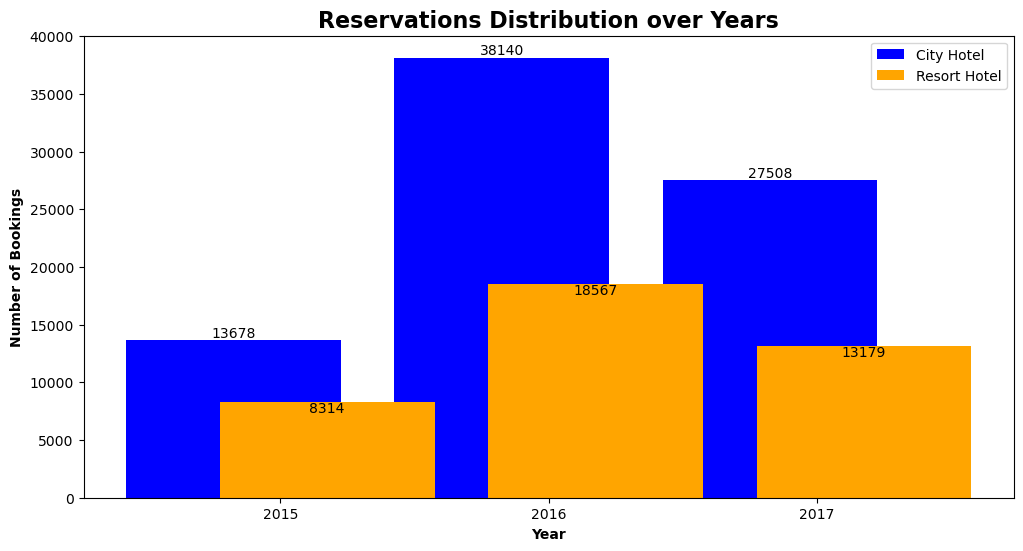

In [11]:
# First, let's figure out which hotel got more activity by year
bookings_activity = df_hb.groupby(['arrival_date_year','hotel']).size().unstack()
print(bookings_activity)

# Total and percentage variables to use on our charts
total_bk_count = bookings_activity.sum()
canceled_percentage = (bookings_activity / total_bk_count) * 100

# Extracting values to create the bar chart
years = bookings_activity.index
ch_count = bookings_activity['City Hotel']
rh_count = bookings_activity['Resort Hotel']

# Chart size
fig, ax = plt.subplots(figsize=(12, 6))

# Positions for the bars
r1 = range(len(years))
r2 = [x + 0.35 for x in r1]

# Bars
bar1 = ax.bar(r1, ch_count, color='blue', label='City Hotel')
bar2 = ax.bar(r2, rh_count, color='orange', label='Resort Hotel')

# Legends
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Number of Bookings', fontweight='bold')
ax.set_title('Reservations Distribution over Years', fontsize=16, fontweight='bold')
ax.set_xticks([r + 0.35/2 for r in range(len(years))])
ax.set_xticklabels(years)
ax.legend()

# Adding the counts over the bars
for bar in bar1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom')

for bar in bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}', ha='center', va='top')
plt.show()

# ax = bookings_activity.plot.bar(rot=0)

##### 4.2 City Hotel Analysis

<p>I will fix the values in the column <i>'is_canceled'</i>. I will replace the 0 and 1 for the values where <u>0 = canceled</u> and <u>1 = not canceled</u>. I'm aware I can do this step earlier, but for the purpose of practicing, I decided to do it twice, one time for each dataframe.</p>

<p>Let's go there</p>

In [12]:
# Changing the values
cancel = {
    0: 'canceled',
    1:'not canceled'
}

df_hb_CH['is_canceled'] = df_hb_CH['is_canceled'].map(cancel)

df_hb_CH['is_canceled'].head(5)

40060        canceled
40061    not canceled
40062    not canceled
40063    not canceled
40064    not canceled
Name: is_canceled, dtype: object

##### 4.2.a Canceled Reservations

<p>This database has data for reservations from the years <i>2015, 2016,</i> and <i>2017</i>. So, first, I will look at the cancellations as a total of those 3 years, and then I will <b>separate</b> the data <u>individually by year</u>.</p>

<p>It will allow stakeholders to know the <i>overall number of cancellations and then be able to compare by year</i>.</p>

canceled        46228
not canceled    33098
Name: is_canceled, dtype: int64


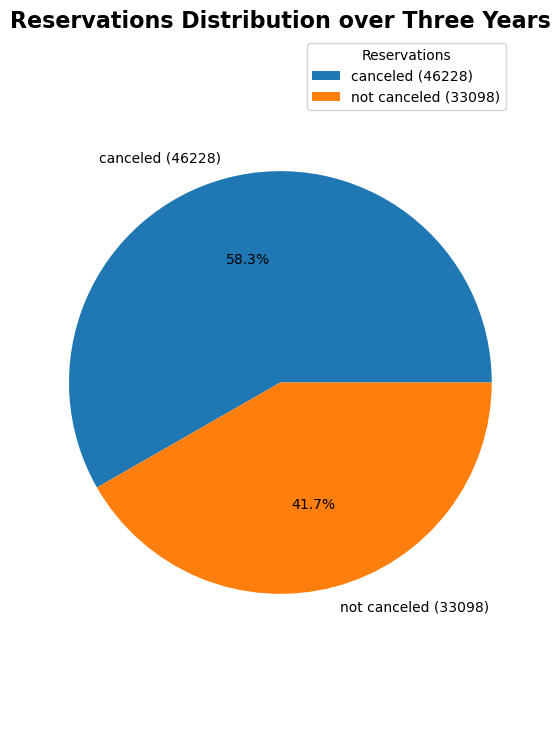

In [13]:
# Counting the canceled or not canceled reservations values and storage them into a variable - CITY HOTEL
canceled_counts = df_hb_CH['is_canceled'].value_counts()
print(canceled_counts)

# Total and percentage variables to use on our charts
total_count = canceled_counts.sum()
canceled_percentage = (canceled_counts / total_count) * 100

# labels = canceled_counts.index
# Using a function to create the labels
labels = [f'{canceled} ({count})' for canceled, count in zip(canceled_counts.index, canceled_counts)]

# Chart size
fig, ax = plt.subplots(figsize=(6, 9))

# Chart generation
plt.pie(canceled_counts, labels=labels, autopct='%1.1f%%')
plt.legend(title='Reservations')
ax.set_title('Reservations Distribution over Three Years', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

<p>The data shows that over the past three years, there have been <u>more canceled</u> reservations, with a <b>total percentage of 58.3%</b>.</p>

<p>Let's analyze which of the three years shows the most canceled reservations.</p>

is_canceled        canceled  not canceled
arrival_date_year                        
2015                   7678          6000
2016                  22733         15407
2017                  15817         11691


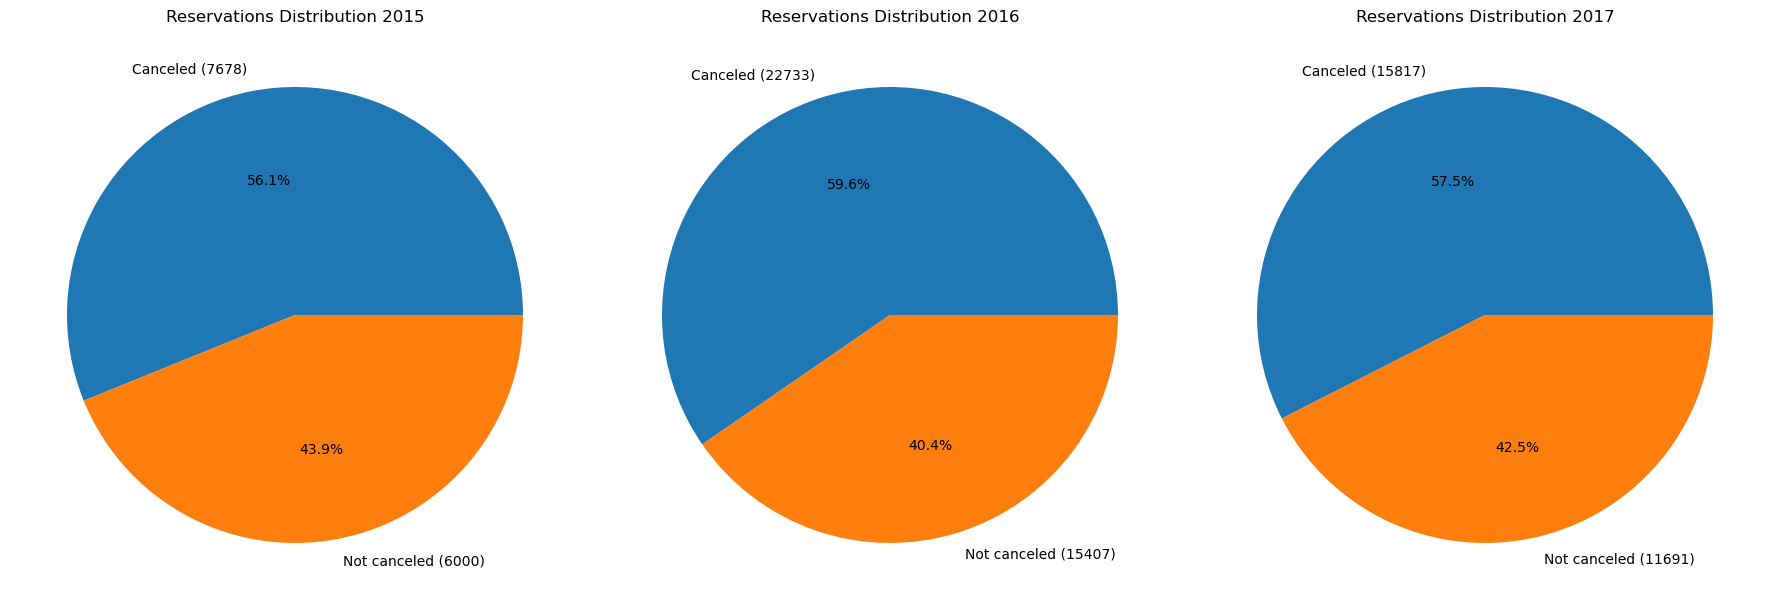

In [14]:
# Separating the cancellations by years
canceled_by_years_count = df_hb_CH.groupby('arrival_date_year', group_keys=False)[['is_canceled']].value_counts().unstack()
print(canceled_by_years_count)

# Plotting the data
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Creating the labels
for i, year in enumerate(canceled_by_years_count.index):
    data = canceled_by_years_count.loc[year]
    labels = [f"{status.capitalize()} ({count})" for status, count in data.items()]
    axs[i].pie(data, labels=labels, autopct='%1.1f%%')
    axs[i].set_title(f'Reservations Distribution {year}')

plt.tight_layout()
plt.show()

##### 4.3 Resort Hotel Analysis

<p>Because this is a practice project, I will perform the same analysis on the Resort Hotel. I will fix the values in the column <i>'is_canceled'</i>. I will replace the 0 and 1 for the values where <u>0 = canceled</u> and <u>1 = not canceled</u>. I'm aware I can do this step earlier, but for the purpose of practicing, I decided to do it twice, one time for each dataframe.</p>

<p>Let's start working with the data.</p>

In [15]:
# Changing the values
cancel = {
    0: 'canceled',
    1:'not canceled'
}

df_hb_RH['is_canceled'] = df_hb_RH['is_canceled'].map(cancel)

df_hb_RH['is_canceled'].head(5)

0    canceled
1    canceled
2    canceled
3    canceled
4    canceled
Name: is_canceled, dtype: object

##### 4.3.a Canceled Reservations

<p>This database has data for reservations from the years <i>2015, 2016,</i> and <i>2017</i>. So, first, I will look at the cancellations as a total of those 3 years, and then I will <b>separate</b> the data <u>individually by year</u>.</p>

<p>It will allow stakeholders to know the <i>overall number of cancellations and then be able to compare by year</i>.</p>

canceled        28938
not canceled    11122
Name: is_canceled, dtype: int64


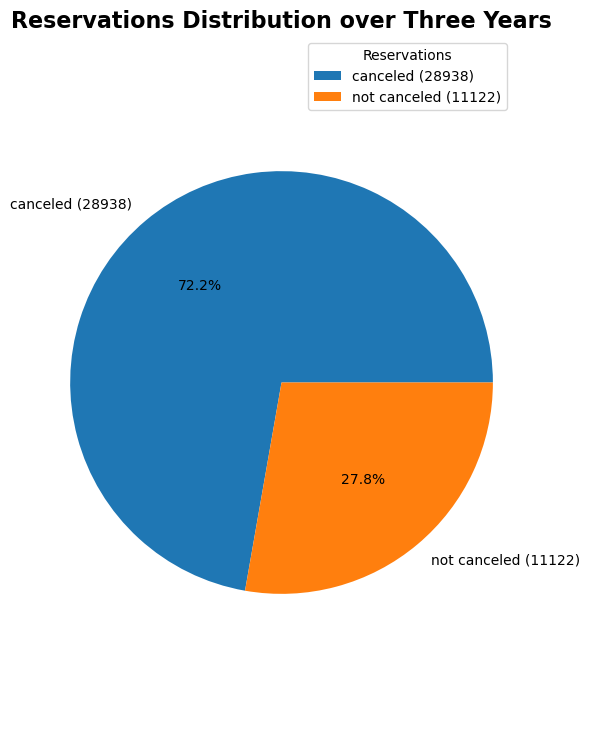

In [16]:
# Counting the canceled or not canceled reservations values and storage them into a variable - RESORT HOTEL
canceled_counts = df_hb_RH['is_canceled'].value_counts()
print(canceled_counts)

# Total and percentage variables to use on our charts
total_count = canceled_counts.sum()
canceled_percentage = (canceled_counts / total_count) * 100

# labels = canceled_counts.index
# Using a function to create the labels
labels = [f'{canceled} ({count})' for canceled, count in zip(canceled_counts.index, canceled_counts)]

# Chart size
fig, ax = plt.subplots(figsize=(6, 9))

# Chart generation
plt.pie(canceled_counts, labels=labels, autopct='%1.1f%%')
plt.legend(title='Reservations')
ax.set_title('Reservations Distribution over Three Years', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

<p>The data shows that over the past three years, there have been <u>more canceled</u> reservations, with a <b>total percentage of 72.2%</b>.</p>

<p>Let's analyze which of the three years shows the most canceled reservations.</p>

is_canceled        canceled  not canceled
arrival_date_year                        
2015                   6176          2138
2016                  13637          4930
2017                   9125          4054


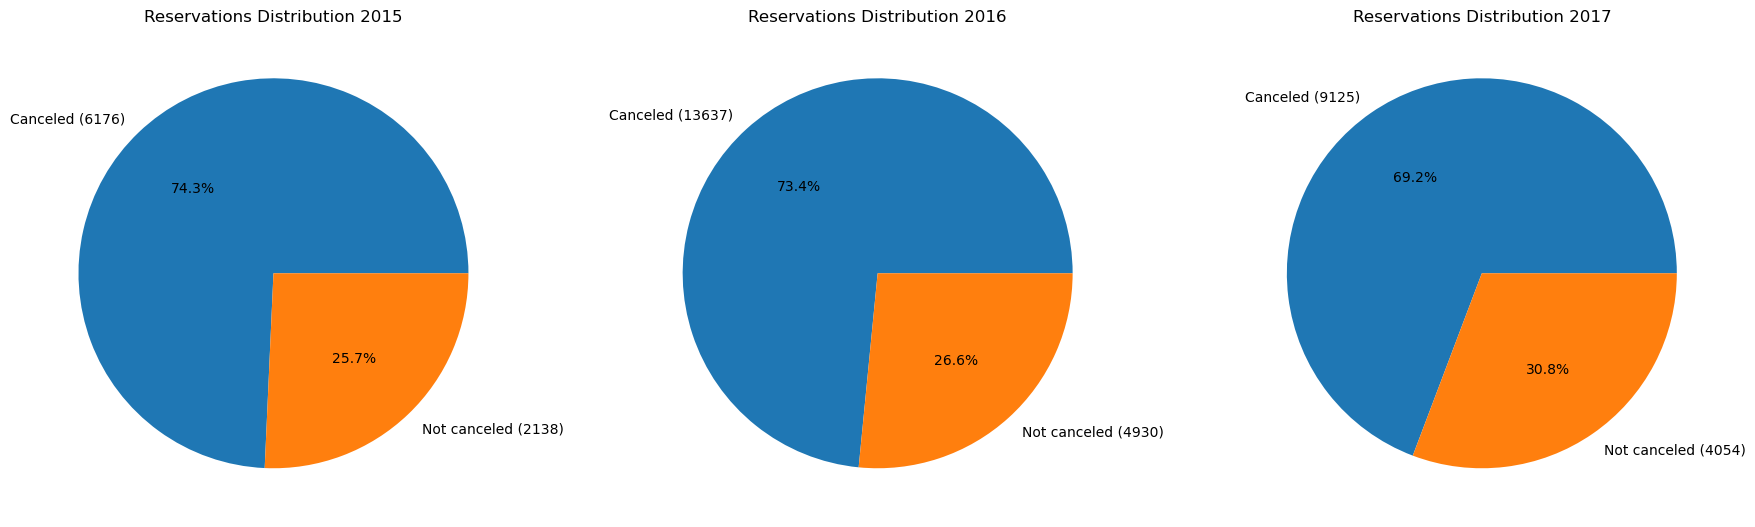

In [17]:
# Separating the cancellations by years
canceled_by_years_count = df_hb_RH.groupby('arrival_date_year', group_keys=False)[['is_canceled']].value_counts().unstack()
print(canceled_by_years_count)

# Plotting the data
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Creating the labels
for i, year in enumerate(canceled_by_years_count.index):
    data = canceled_by_years_count.loc[year]
    labels = [f"{status.capitalize()} ({count})" for status, count in data.items()]
    axs[i].pie(data, labels=labels, autopct='%1.1f%%')
    axs[i].set_title(f'Reservations Distribution {year}')

plt.tight_layout()
plt.show()

<p>By analyzing both hotels, <b>CITY</b> and <b>RESORT</b>, it can be seen that the <i>RESORT</i> has a <u>higher</u> percentage of cancellations, with a total of <b>72.2%</b> against a <b>58.3%</b> of the <i>CITY</i> hotel. However, when I analyzed the cancellations by year, I observed a slight decrease in cancellations at the <i>RESORT</i> can be observed over the years, as opposed to the <i>CITY</i> hotel that showed an increase in the last year.</p>

##### 4.4 What affects Cancellations?

<p>For this analysis, I will create a new database with the columns <i>hotel, is_canceled, lead_time, market_segment, and customer_type</i>, to examine and understand, What is causing the cancellations?</p>

<p>Let's create our new database to work with.</p>

##### 4.4.a New Database

In [18]:
# Creating the new data structure
df_cancellations = df_hb[['hotel','is_canceled','lead_time','market_segment','customer_type','arrival_date_year']].copy()

df_cancellations.head(5)

,hotel,is_canceled,lead_time,market_segment,customer_type,arrival_date_year
0,Resort Hotel,0,342,Direct,Transient,2015
1,Resort Hotel,0,737,Direct,Transient,2015
2,Resort Hotel,0,7,Direct,Transient,2015
3,Resort Hotel,0,13,Corporate,Transient,2015
4,Resort Hotel,0,14,Online TA,Transient,2015


In [19]:
df_cancellations.dtypes

hotel                object
is_canceled           int64
lead_time             int64
market_segment       object
customer_type        object
arrival_date_year     int64
dtype: object

<p>With the new database, let's visualize distributions and relationships between variables.</p>

<p>I will use the values from the column <i>'lead_time'</i> into a histogram to visualize the number of days that elapsed between the entering date and the arrival date. The histogram will show the distribution of a variable, counting the number of observations.</p>

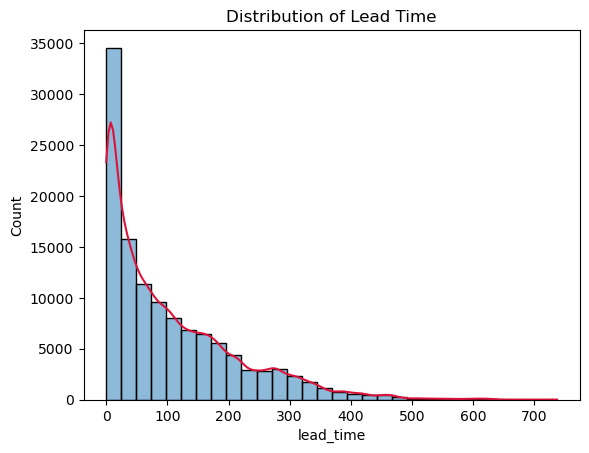

In [20]:

ax = sns.histplot(df_cancellations['lead_time'], bins=30, kde=True)
ax.lines[0].set_color('crimson')
plt.title('Distribution of Lead Time')
plt.show()

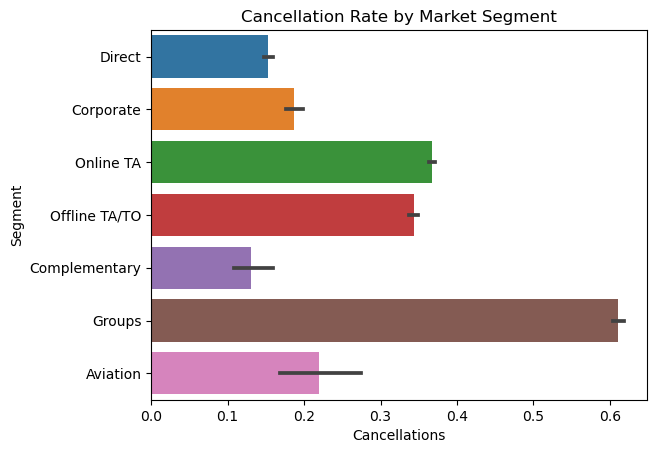

In [21]:
# Cancellation rate by market segment

sns.barplot(x='is_canceled', y='market_segment', data=df_cancellations)
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Cancellations')
plt.ylabel('Segment')
plt.show()

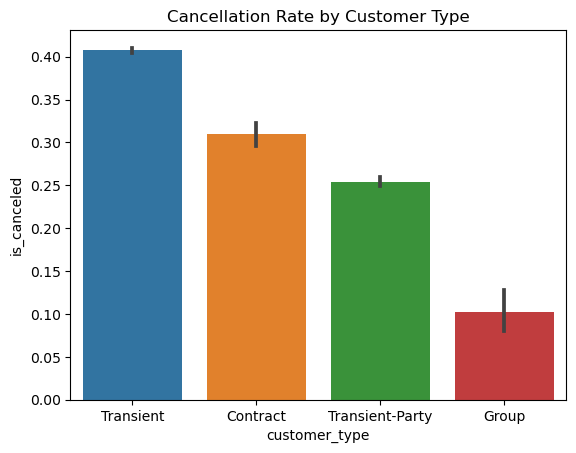

In [22]:
# Cancellation rate by customer type
sns.barplot(x='customer_type', y='is_canceled', data=df_cancellations)
plt.title('Cancellation Rate by Customer Type')
plt.show()

##### 4.4.b Analyzing the impact of the variables used

<p>Is it time to use a machine learning model to understand which of our variables are <i>affecting the cancellations? I will use a logistic regression model to understand the relationship between the data in the columns <i>'is_canceled', 'lead_time', 'market_segment',</i> and<i>'customer_type'</i>.</p>

In [23]:
# First let's create our logistic regression model
cancellation_model = smf.logit('is_canceled ~ lead_time + C(market_segment) + C(customer_type)', data=df_cancellations).fit()

# Model Sypnosis
print(cancellation_model.summary())


Optimization terminated successfully.
         Current function value: 0.563430
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:               119386
Model:                          Logit   Df Residuals:                   119375
Method:                           MLE   Df Model:                           10
Date:                Fri, 21 Jun 2024   Pseudo R-squ.:                  0.1452
Time:                        17:14:25   Log-Likelihood:                -67266.
converged:                       True   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -2.3478      0.163 

<p>After the model has been developed and presented, it is necessary to <u>comprehend</u> the significance of <b>every variable</b>.<p>

In [24]:
# Extracting the values and coefficients
cancellation_coef = cancellation_model.params
cancellation_values = cancellation_model.pvalues

# Display coefficients and p-values
print(f"Coefficients:\n{cancellation_coef}\n")
print(f"P-values:\n{cancellation_values}\n")

Coefficients:
Intercept                             -2.347786
C(market_segment)[T.Complementary]    -0.713530
C(market_segment)[T.Corporate]         0.017277
C(market_segment)[T.Direct]           -0.714733
C(market_segment)[T.Groups]            1.830286
C(market_segment)[T.Offline TA/TO]     0.380110
C(market_segment)[T.Online TA]         0.297807
C(customer_type)[T.Group]             -0.464664
C(customer_type)[T.Transient]          1.139408
C(customer_type)[T.Transient-Party]   -0.675040
lead_time                              0.005531
dtype: float64

P-values:
Intercept                               7.434710e-47
C(market_segment)[T.Complementary]      2.063348e-04
C(market_segment)[T.Corporate]          9.152015e-01
C(market_segment)[T.Direct]             8.137130e-06
C(market_segment)[T.Groups]             2.546703e-30
C(market_segment)[T.Offline TA/TO]      1.694970e-02
C(market_segment)[T.Online TA]          6.027475e-02
C(customer_type)[T.Group]               1.769141e-03
C(custom

<p>Let's create a chart to visualize our data</p>

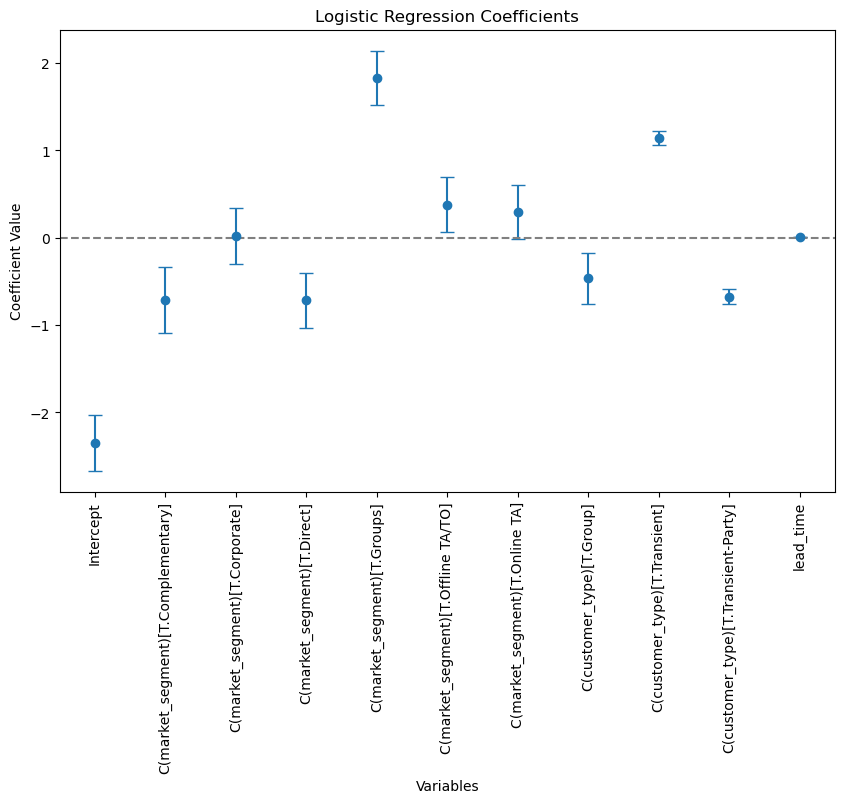

In [25]:
# I will need the confidence intervals. Remember the coef I already have them
cancell_conf = cancellation_model.conf_int()

# Adding the coefficients to the confidence model
cancell_conf['coeff'] = cancellation_coef

# To understand the data let's rename the columns
cancell_conf.columns = ['2.5%','97.5%', 'coeff']

# Creating the chart
plt.figure(figsize=(10, 6))
plt.errorbar(cancell_conf.index, cancell_conf['coeff'], yerr=[cancell_conf['coeff'] - cancell_conf['2.5%'], cancell_conf['97.5%'] - cancell_conf['coeff']], fmt='o', capsize=5)
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=90)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.show()

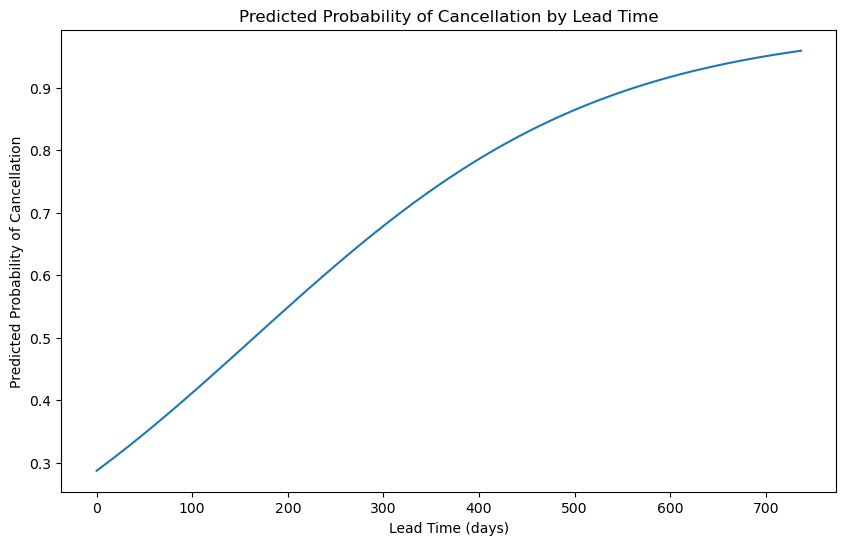

In [26]:
# Generate a range of lead time values
lead_time_range = np.linspace(df_cancellations['lead_time'].min(), df_cancellations['lead_time'].max(), 100)
predict_data = pd.DataFrame({
    'lead_time': lead_time_range,
    'market_segment': 'Online TA',  # Set to a reference category for simplicity
    'customer_type': 'Transient'  # Set to a reference category for simplicity
})

# Predict probabilities
predict_data['predicted_prob'] = cancellation_model.predict(predict_data)

# Plot predicted probabilities
plt.figure(figsize=(10, 6))
plt.plot(predict_data['lead_time'], predict_data['predicted_prob'])
plt.title('Predicted Probability of Cancellation by Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Predicted Probability of Cancellation')
plt.show()

##### 4.5 How about the lead time on bookings?

<p>For this analysis, I will create a new database with the columns <i>hotel, lead_time, is_canceled, adr, arrival_date_year, arrival_date_month, market_segment, customer_type</i> to analyze if the lead time on bookings is affecting the cancellations.</p>

<p>Let's try to understand booking patterns so the hotel can create pricing strategies to offer their clients.</p>

##### 4.5.a Database for the Bookings Analysis

In [27]:
# Creating bookings database
df_book_lt = df_hb[['hotel','lead_time','is_canceled','adr','arrival_date_year','arrival_date_month','market_segment','customer_type']].copy()

df_book_lt.head(5)

,hotel,lead_time,is_canceled,adr,arrival_date_year,arrival_date_month,market_segment,customer_type
0,Resort Hotel,342,0,0.0,2015,July,Direct,Transient
1,Resort Hotel,737,0,0.0,2015,July,Direct,Transient
2,Resort Hotel,7,0,75.0,2015,July,Direct,Transient
3,Resort Hotel,13,0,75.0,2015,July,Corporate,Transient
4,Resort Hotel,14,0,98.0,2015,July,Online TA,Transient


In [28]:
df_book_lt.dtypes

hotel                  object
lead_time               int64
is_canceled             int64
adr                   float64
arrival_date_year       int64
arrival_date_month     object
market_segment         object
customer_type          object
dtype: object

<p>With the new database, let's visualize distributions and relationships between variables.</p>

##### 4.5.a.1 Bookings Analysis
<p>Let's start analyzing the average lead time between the city and resort hotel to understand which hotel has more anticipation with bookings.</p>

In [29]:
# Average lead time bookings
bavg_lead_time = df_book_lt.groupby('hotel')['lead_time'].mean()
print(bavg_lead_time)



hotel
City Hotel      109.741106
Resort Hotel     92.675686
Name: lead_time, dtype: float64


Correlation between lead time and cancellation rate: 0.29


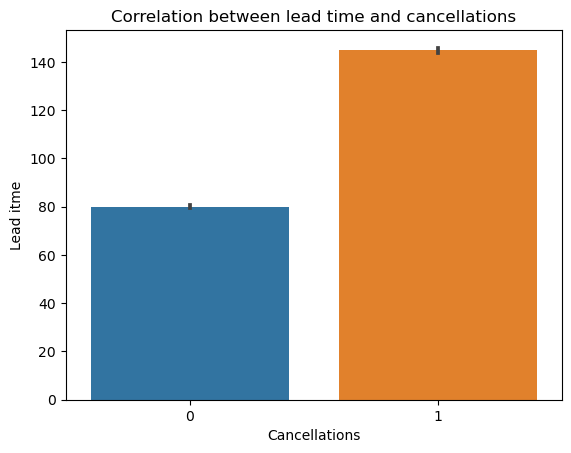

In [30]:
# Let's analyze the correlation between lead time and cancellations
corr_cancellation = df_book_lt['lead_time'].corr(df_book_lt['is_canceled']).round(2)
print(f"Correlation between lead time and cancellation rate: {corr_cancellation}")


# Data visualization
sns.barplot(x='is_canceled', y='lead_time', data=df_book_lt)
plt.title('Correlation between lead time and cancellations')
plt.xlabel('Cancellations')
plt.ylabel('Lead itme')
plt.show()

<p>The results of our analysis show that there is little association between the two variables, <i>'Lead Time'</i> and <i>'Cancellations'</i>, with a correlation coefficient of <b>0.29</b>. The cancellations are unaffected by the time.<p>

<p>Let's introduce a new variable to our analysis, the <b><i>ADR (Average Daily rate)</i></b>, and try to identify if this variable is affecting the cancellations in the hotel.</p>

In [31]:
# Correlation between lead time and ADR
corr_adr = df_book_lt['lead_time'].corr(df_book_lt['adr']).round(2)
print(f"Correlation between lead time and ADR: {corr_adr}")

Correlation between lead time and ADR: -0.06


<p>The results of the analysis show a correlation coefficient of <b>-0.06</b>. There is no correlation between the two variables, <i>'Lead Time'</i> and <i>'ADR'</i>. This variable is not affecting the cancellations.<p>

<p>Let's add some visualization to our data and try to figure out how variables are working between them. This will help us find meaningful insights.</p>

<p><i><u>Visualizing the Lead Time Distribution</u></i></p>
<p>To visualize our data, I will use the values from the <i>'arrival_date_month' column</i>. These values and the histogram will help us better understand our analysis.</p>

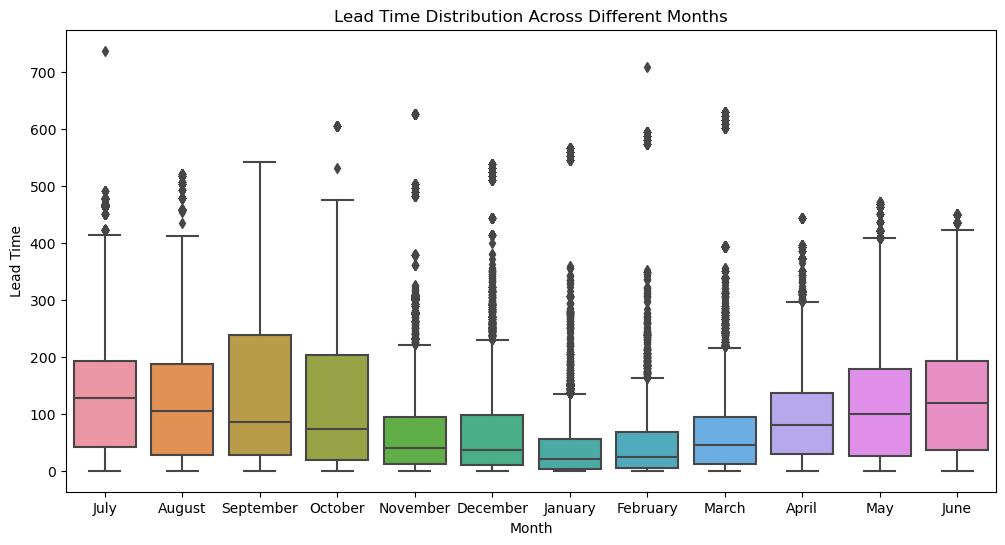

In [32]:
# Creating the visualization with the correlation between 'lead_time' and 'arrival_date_month'
# Size of the boxplot
plt.figure(figsize=(12, 6))

# Boxplot for the months
sns.boxplot(x='arrival_date_month', y='lead_time', data=df_book_lt)
plt.title('Lead Time Distribution Across Different Months')
plt.xlabel('Month')
plt.ylabel('Lead Time')
plt.show()

<p>As expected, the most occupied time is when vacations occur. It starts in May and ends in October. It is important to highlight September as one of the months showing the most reservations.</p>

<p>Let's analyze how occupation distributes for the different hotel segments</p>

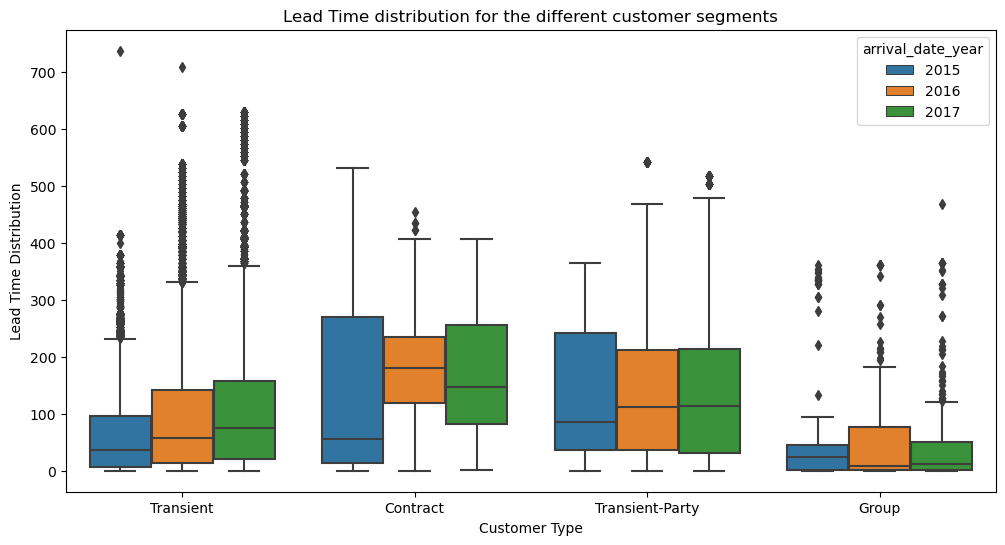

In [33]:
# I will use the customer data from the customer_type column. Let's create our chart
# Giving our boxplot a size
plt.figure(figsize=(12,6))

# Boxplot with the customer segments
sns.boxplot(x='customer_type', y='lead_time', hue='arrival_date_year', data=df_book_lt)
plt.title('Lead Time distribution for the different customer segments')
plt.xlabel('Customer Type')
plt.ylabel('Lead Time Distribution')
plt.show()

<p>After visualizing the data, let's discribe the conclusions by customer segments:</p>
<ul>
<li><i>Transient</i> customers, because there are too many outlier values. </u> This customers shows disparate reservations, but most of the time their bookings are close to the stay date. Between the three years, their median lead time is approximately 50 days. </li>

<li><i>Contract</i> customers, the variability in lead time bookings in 2015 shows a high variability, and from 2016 it starts to decrease. Also, the median was around 50 days in 2015, but then increased in 2016 to around 180 days, and by 2017, it decreased to approximately 150 days. The booking spread is also in advance of the arrival date. </li>

<li>A close look at <i>Transient-Party</i> customers data shows that the median number of bookings significantly increased from 2015 to 2017, going from 80 to 100 days approximately. There is not much variability in the lead time for bookings. They present a reduction in lead time variability in 2017. In 2016, because of some outlier values, they are starting to book far in advance of their arrival date.</li>

<li><i>Group</i> customers show the lowest median lead time among all customers; they tend to book near the stay date. It's important to notice that because of too many outlier values, they also register bookings far in advance of the stay date. They are the most consistent with their bookings across the years.</li>
</ul>

<p><b><i>Recommendations:</i></b></p>
<ul>
<li>Create targeted marketing strategies for customers based on their booking patterns. One of them can be a booking discount with the purpose of encouraging customers to book at a more advanced time.</li>
<li>Establish long-term pricing contracts to help advance bookings with the <i>Contract</i> customers. This type of strategy will help to optimize revenue.</li>
<li>Is it possible to allocate resources and staffing to more predictable segments because of their booking pattern to give them a different management approach.</li>
</ul>

##### 4.6 Revenue Analysis

<p>It's time to analyze the <b>ADR</b> (Average Daily Rate) for each hotel. Let's understand how much revenue is made for each of the hotels, <i>City</i>, and <i>Resort</i>. I will start comparing the <i>ADR</i> between both of them. Later, I will analyze the variation by <u>segment</u> and <u>lead time</u>.</p>

<p>For this new analysis I will create a new data frame.</p>

In [34]:
# Creating the new data frame for the revenue analysis
df_revAdr = df_hb[['hotel','adr', 'market_segment', 'customer_type', 'lead_time', 'arrival_date_year', 'reserved_room_type', 'assigned_room_type']].copy()

df_revAdr.head(5)

,hotel,adr,market_segment,customer_type,lead_time,arrival_date_year,reserved_room_type,assigned_room_type
0,Resort Hotel,0.0,Direct,Transient,342,2015,C,C
1,Resort Hotel,0.0,Direct,Transient,737,2015,C,C
2,Resort Hotel,75.0,Direct,Transient,7,2015,A,C
3,Resort Hotel,75.0,Corporate,Transient,13,2015,A,A
4,Resort Hotel,98.0,Online TA,Transient,14,2015,A,A


##### 4.6.a Comparing the ADR between City and Resort Hotels.

In [35]:
# Grouping the data by hotel
mean_Adr = df_revAdr.groupby('hotel')['adr'].mean().round(2).reset_index()

print(mean_Adr)

          hotel     adr
0    City Hotel  105.31
1  Resort Hotel   94.95


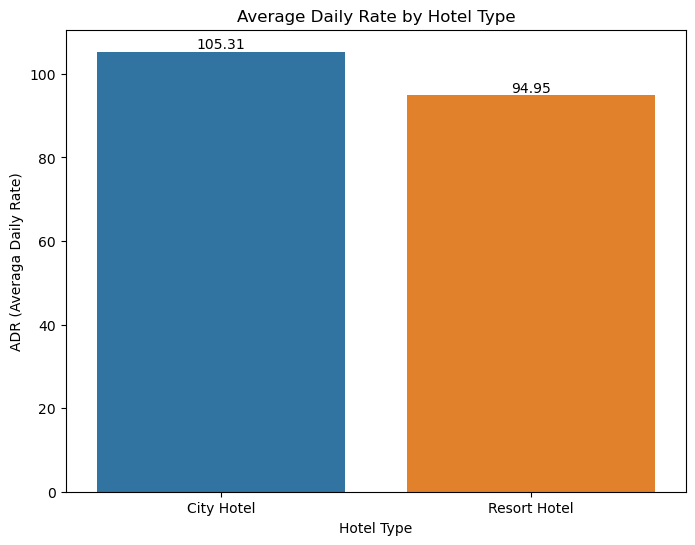

In [36]:
# Visualizing the data with a barplot
plt.figure(figsize=(8, 6))

# Creating the plot
ax = sns.barplot(x='hotel', y='adr', data=mean_Adr)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Average Daily Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('ADR (Averaga Daily Rate)')
plt.show()

<p>The data shows us that the ADR for the <i>City Hotel</i> is <b>105.31</b>, and for the <i>Resort Hotel</i> is <b>94.95</b>.</p>

##### 4.6.b Analyzing the ADR variation between Room Types, Market Segment and Lead Time.

##### 4.6.b.1 ADR variation by Room Types.

In [37]:
# Variation by room types
mean_adr_rt = df_revAdr.groupby('reserved_room_type')['adr'].mean().round().reset_index()

print(mean_adr_rt)

  reserved_room_type    adr
0                  A   91.0
1                  B   91.0
2                  C  160.0
3                  D  121.0
4                  E  125.0
5                  F  168.0
6                  G  176.0
7                  H  188.0
8                  L  125.0
9                  P    0.0


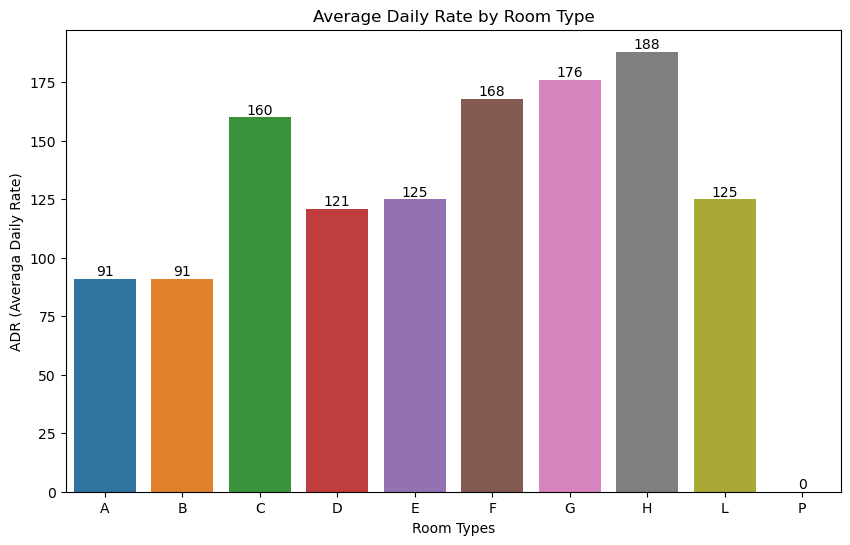

In [38]:
# Creating the plot
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='reserved_room_type', y='adr',  data=mean_adr_rt)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Average Daily Rate by Room Type')
plt.xlabel('Room Types')
plt.ylabel('ADR (Averaga Daily Rate)')
plt.show()

<p>Room Types variation by Hotels</p>

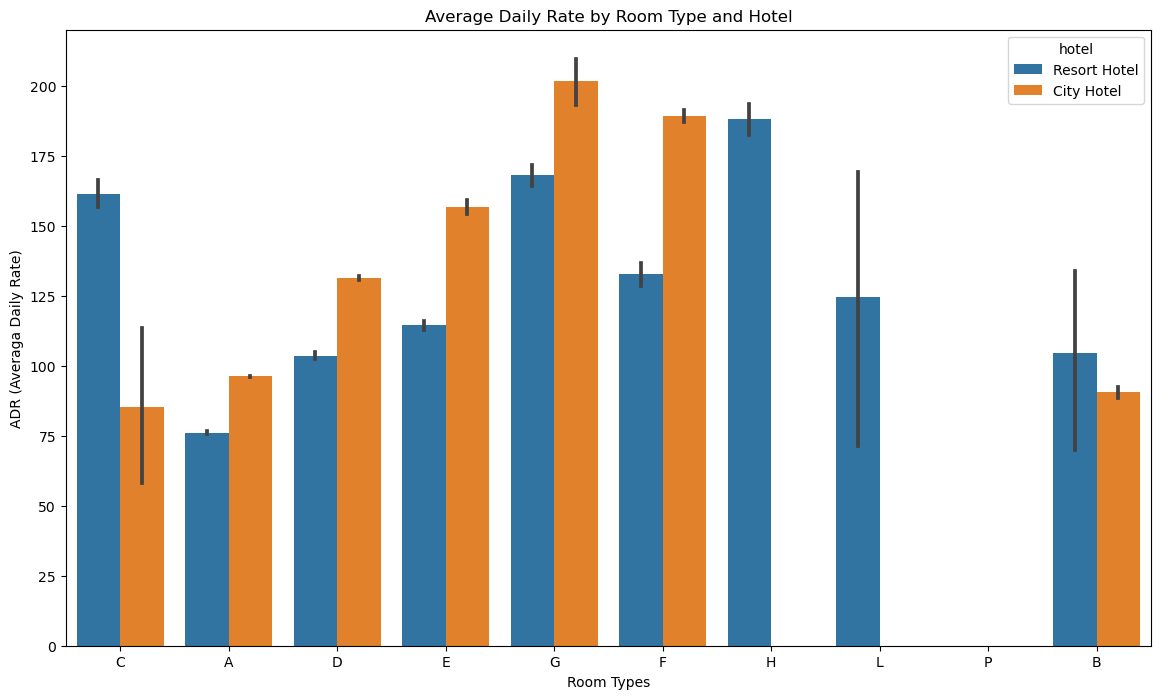

In [39]:
# Creating the plot
plt.figure(figsize=(14, 8))

ax = sns.barplot(x='reserved_room_type', y='adr',  hue='hotel', data=df_revAdr)

plt.title('Average Daily Rate by Room Type and Hotel')
plt.xlabel('Room Types')
plt.ylabel('ADR (Averaga Daily Rate)')
plt.show()

<p>Let's analyze if the hotels assign the rooms the customers have booked.</p>

<p>I will compare the values from the column <i>'reserved_room_type'</i> and <i>'assigned_room_type'</i>. I will store the result of the comparison into a new column called <i>'room_assigned_correctly'</i>, with 0 for <i>False</i> values, and 1 for <i>True</i> values.</p>

In [40]:
# Let's compare the values from the columns
df_revAdr['room_assigned_correctly'] = (df_revAdr['reserved_room_type'] == df_revAdr['assigned_room_type']).astype(int)

df_revAdr.head()

,hotel,adr,market_segment,customer_type,lead_time,arrival_date_year,reserved_room_type,assigned_room_type,room_assigned_correctly
0,Resort Hotel,0.0,Direct,Transient,342,2015,C,C,1
1,Resort Hotel,0.0,Direct,Transient,737,2015,C,C,1
2,Resort Hotel,75.0,Direct,Transient,7,2015,A,C,0
3,Resort Hotel,75.0,Corporate,Transient,13,2015,A,A,1
4,Resort Hotel,98.0,Online TA,Transient,14,2015,A,A,1


<p>Now with the new column let's visualize how the room assignment is working</p>

1    104469
0     14917
Name: room_assigned_correctly, dtype: int64


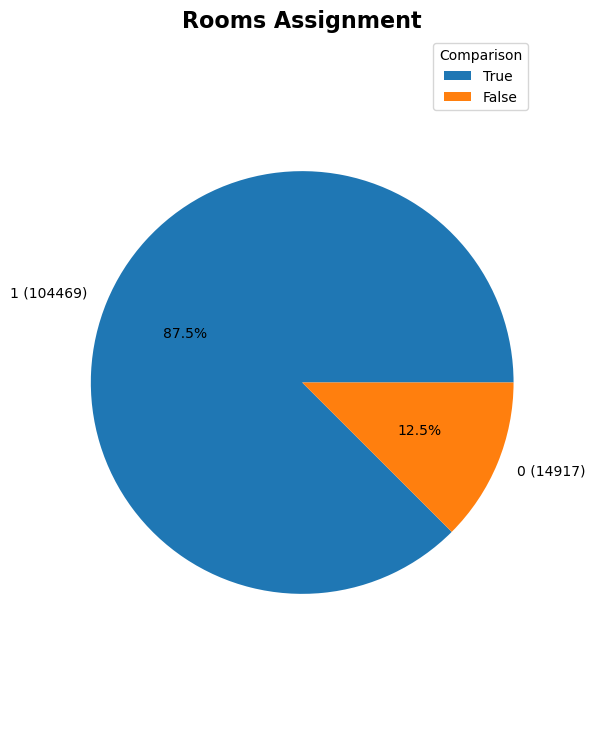

In [53]:
# Counting the values
room_corr_assigned = df_revAdr['room_assigned_correctly'].value_counts()

print(room_corr_assigned)

# Total and percentage variables to use on our charts
total_rca_count = room_corr_assigned.sum()
rca_percentage = (room_corr_assigned / total_rca_count) * 100

# labels = room_corr_assigned.index
# Using a function to create the labels
labels = [f'{rooms} ({count})' for rooms, count in zip(room_corr_assigned.index, room_corr_assigned)]

# Chart size
fig, ax = plt.subplots(figsize=(6, 9))

# Chart generation
plt.pie(room_corr_assigned, labels=labels, autopct='%1.1f%%')
ax.legend(['True', 'False'], loc='upper right', title='Comparison')
# plt.legend(title='Correctly')
ax.set_title('Rooms Assignment', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

##### 4.6.b.2 ADR variation by Market Segments.

In [41]:
# Variation by market segment
mean_adr_mkt = df_revAdr.groupby('market_segment')['adr'].mean().round().reset_index()

print(mean_adr_mkt)

  market_segment    adr
0       Aviation  100.0
1  Complementary    3.0
2      Corporate   69.0
3         Direct  115.0
4         Groups   79.0
5  Offline TA/TO   87.0
6      Online TA  117.0


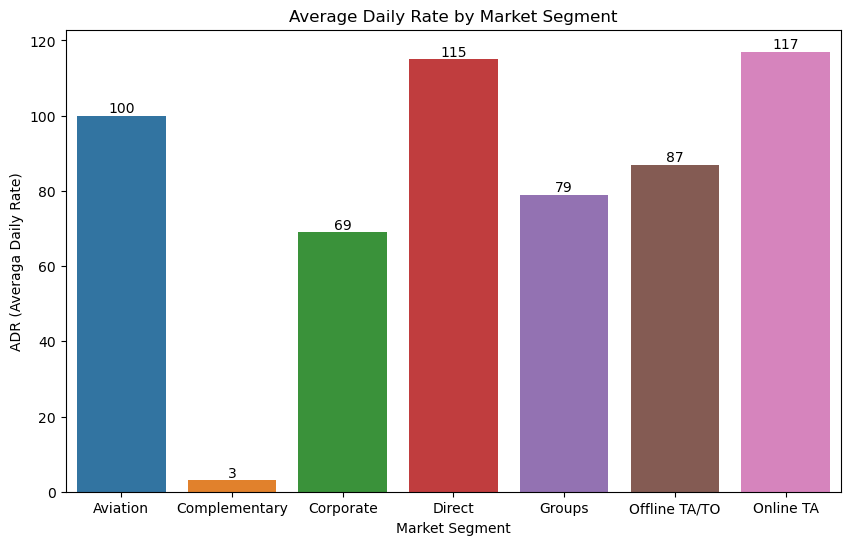

In [42]:
# Creating the plot
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='market_segment', y='adr', data=mean_adr_mkt)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Average Daily Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('ADR (Averaga Daily Rate)')
plt.show()

<p>Market Segment variation by Hotels</p>

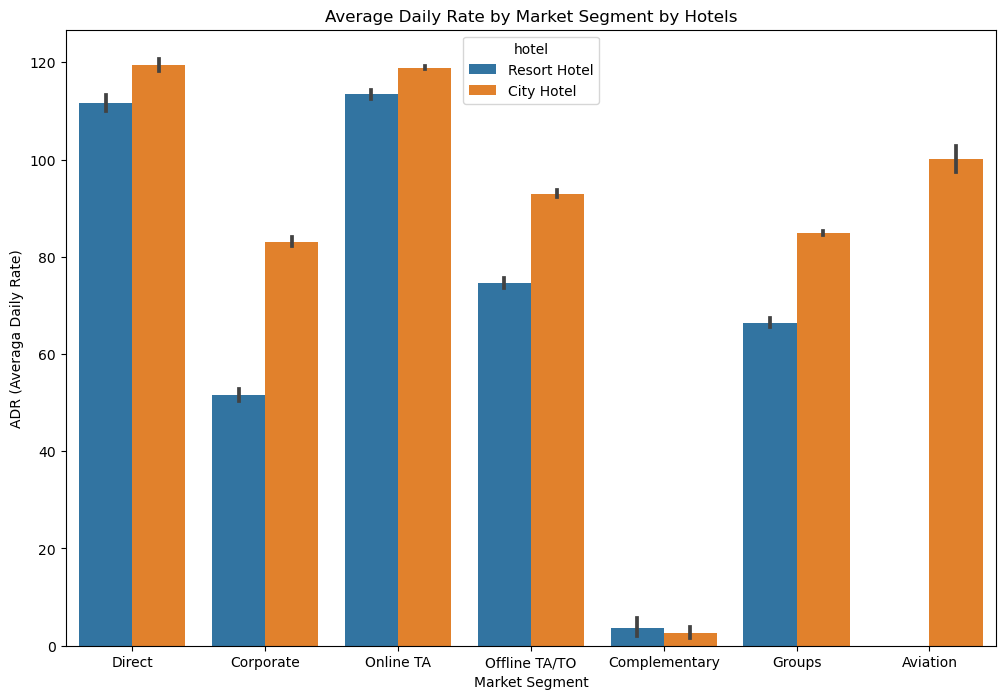

In [43]:
# Creating the plot
plt.figure(figsize=(12, 8))

ax = sns.barplot(x='market_segment', y='adr', hue='hotel', data=df_revAdr)
plt.title('Average Daily Rate by Market Segment by Hotels')
plt.xlabel('Market Segment')
plt.ylabel('ADR (Averaga Daily Rate)')
plt.show()

##### 4.6.b.3 ADR variation by Lead Time.

In [44]:
# Variation by Lead Time: Because the values are too big, I separate the values into bins for a better understanding.
# Enclosing the data values
df_revAdr['lt_enclosed'] = pd.cut(df_revAdr['lead_time'], bins=[0, 30, 90, 180, 365], labels=['0-30', '31-90', '91-180', '181-365'])
mean_adr_ltbucket = df_revAdr.groupby('lt_enclosed')['adr'].mean().round().reset_index()
mean_adr_lt = df_revAdr.groupby('lead_time')['adr'].mean().round().reset_index()

print(mean_adr_lt)
print(mean_adr_ltbucket)

     lead_time   adr
0            0  83.0
1            1  90.0
2            2  94.0
3            3  93.0
4            4  95.0
..         ...   ...
474        622  62.0
475        626  63.0
476        629  62.0
477        709  68.0
478        737   0.0

[479 rows x 2 columns]
  lt_enclosed    adr
0        0-30  102.0
1       31-90  107.0
2      91-180  109.0
3     181-365   95.0


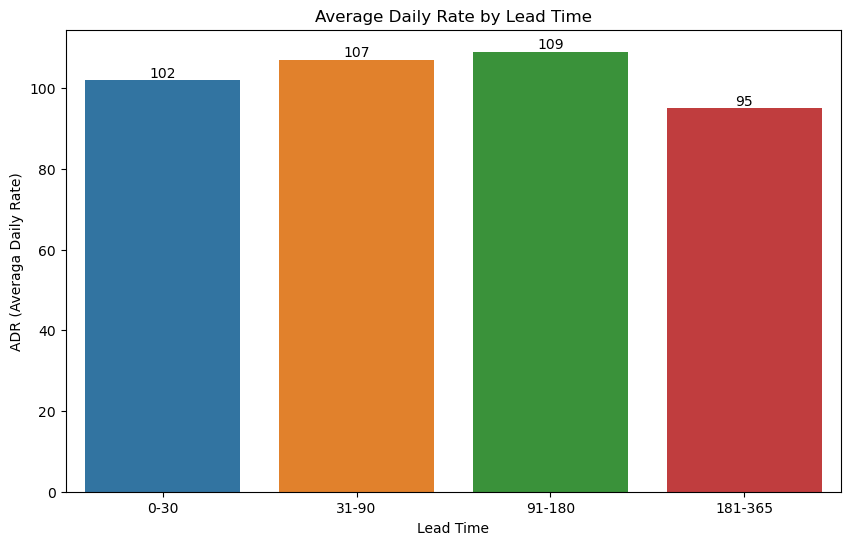

In [45]:
# Creating the plot
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='lt_enclosed', y='adr', data=mean_adr_ltbucket)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Average Daily Rate by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('ADR (Averaga Daily Rate)')
plt.show()

<p>Lead Time variation by Hotels</p>

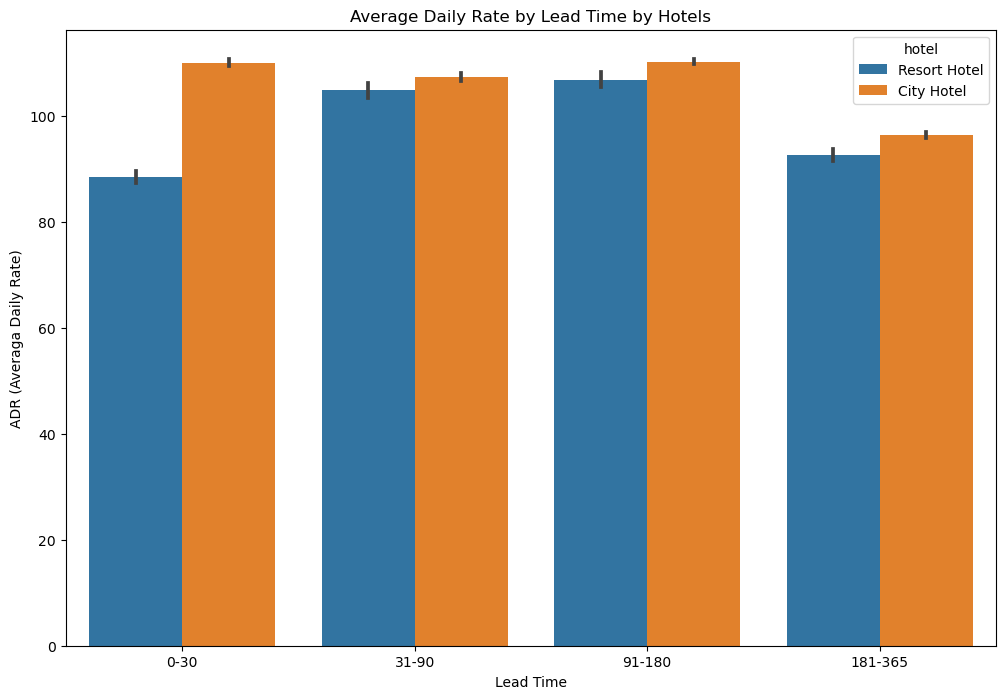

In [46]:
# Creating the plot
plt.figure(figsize=(12, 8))

ax = sns.barplot(x='lt_enclosed', y='adr', hue='hotel', data=df_revAdr)
plt.title('Average Daily Rate by Lead Time by Hotels')
plt.xlabel('Lead Time')
plt.ylabel('ADR (Averaga Daily Rate)')
plt.show()

##### 4.7 Customer Segmentation